In [1]:
from __future__ import division
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np,  matplotlib.pyplot as plt
from time import time
from pylab import plot, show, legend
from PF import *
from Lorenz63 import *
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [2]:
dt = 1e-3
delta = 10*dt
T = 500

sigma, rho, beta, noise_intensity, obs_noise = 10.0, 28.0, 8/3, 1e-1, 2e-1
theta = [sigma, rho, beta, noise_intensity, dt, delta, obs_noise]
x_0 = np.ones(3)

y, latent = simulate_data_Lorenz63(theta, x_0, T)
data_Lorenz63 = dict(x_0=x_0, y=y)

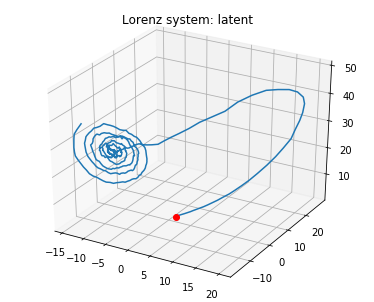

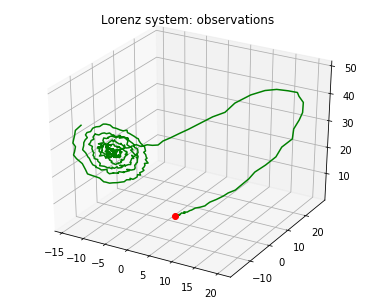

In [3]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(latent[:,0], latent[:,1], latent[:,2])
ax.plot(latent[0:1,0], latent[0:1,1], latent[0:1,2], 'ro')
plt.title("Lorenz system: latent")

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(y[:,0], y[:,1], y[:,2], color='green')
ax.plot(y[0:1,0], y[0:1,1], y[0:1,2], 'ro')
plt.title("Lorenz system: observations");

In [4]:
def test_fn(x) : 
    return np.mean(x,1)

In [9]:
N = 500

start = time()
log_NC_b, test_fn_est_b = bootstrap_PF(data_Lorenz63, theta, potential_Lorenz63, propagate_Lorenz63, test_fn, N)
print(round(time() - start, 1), "seconds")

C = 100
alpha = d_regular_graph(N, C)
start = time()
log_NC_aa, test_fn_est_aa = alphaSMC(data_Lorenz63, theta, potential_Lorenz63, propagate_Lorenz63, 
                                     test_fn, N, C, alpha)
print(round(time() - start, 1), "seconds")

start = time()
log_NC_aa1, test_fn_est_aa1 = alphaSMC(data_Lorenz63, theta, potential_Lorenz63, propagate_Lorenz63, 
                                       test_fn, N, C, "random")
print(round(time() - start, 1), "seconds")

start = time()
log_NC_a, test_fn_est_a = alphaSMC_random(data_Lorenz63, theta, potential_Lorenz63, propagate_Lorenz63, 
                                          test_fn, N, C)
print(round(time() - start, 1), "seconds")

  0%|          | 0/500 [00:00<?, ?it/s]

0.5 seconds


  0%|          | 1/500 [00:00<01:27,  5.70it/s]

1.2 seconds


  1%|          | 4/500 [00:00<00:15, 31.22it/s]

83.4 seconds


100%|██████████| 500/500 [00:15<00:00, 31.30it/s]

16.0 seconds


In [10]:
np.round([log_NC_b[-1], log_NC_a[-1], log_NC_aa[-1], log_NC_aa1[-1]], 2)

array([-167.04, -164.06, -165.71, -162.38])

Text(0.5, 1.0, 'Connectivity constant vs d')

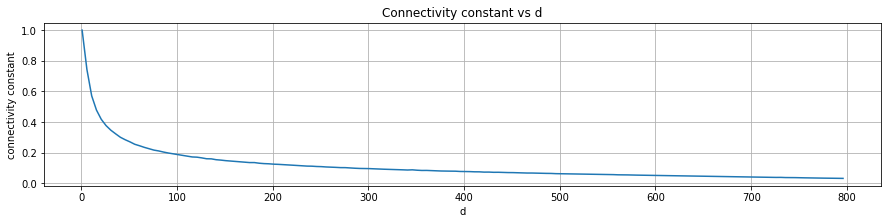

In [14]:
N = 1000
d_list = np.arange(1,int(0.8*N)+1,5)
connect_consts = np.zeros(len(d_list))
for i in trange(len(d_list)) :
    d = d_list[i]
    alpha = d_regular_graph(N, d, fix_seed=False)
    connect_consts[i] = connectivity_const(alpha) 
    
plt.plot(d_list,connect_consts)
plt.xlabel("d")
plt.ylabel("connectivity constant")
plt.grid(True)
plt.title("Connectivity constant vs d")

In [17]:
np.arange(100,5050,100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900, 5000])

100%|██████████| 50/50 [45:27<00:00, 162.09s/it]


Text(0.5, 1.0, 'Connectivity constant vs d')

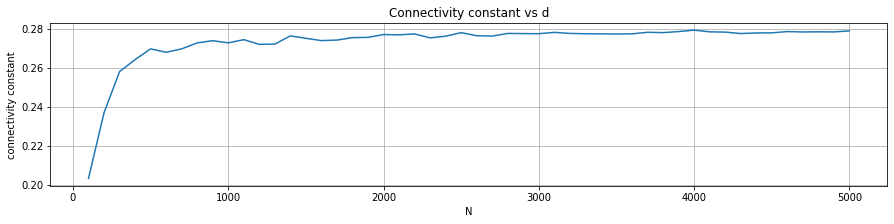

In [19]:
d = 50
N_list = np.arange(100,5050,100)
connect_consts = np.zeros(len(N_list))
for i in trange(len(N_list)) :
    N = N_list[i]
    alpha = d_regular_graph(N, d, fix_seed=False)
    connect_consts[i] = connectivity_const(alpha) 
    
plt.plot(N_list,connect_consts)
plt.xlabel("N")
plt.ylabel("connectivity constant")
plt.grid(True)
plt.title("Connectivity constant vs d")

In [10]:
print(connectivity_const(d_regular_graph(N=500, C=20)))
print(connectivity_const(d_regular_graph(N=500, C=100)))

0.4220155342795024
0.1803767252816863


In [3]:
print(connectivity_const(d_regular_graph(N=50, C=20)))
print(connectivity_const(d_regular_graph(N=500, C=20)))
print(connectivity_const(d_regular_graph(N=5000, C=20)))

0.34000104190798264
0.4220155342795024
0.43373931557559564


In [50]:
np.sum(np.abs(alpha-alpha.T))

0.0

In [20]:
np.sort(npr.rand(10))

array([0.05376589, 0.05459657, 0.10736113, 0.19509214, 0.2472166 ,
       0.30578825, 0.52394498, 0.65980622, 0.70458496, 0.9001761 ])